In [1]:
import pandas as pd
import numpy as np
import os, sys
sys.path.insert(0, os.path.abspath('../..'))
import source.data_handling.data_preparation as dp
import source.regression.regression_models as modl
import source.trading_strategies.trading_strategy_helpers as tsh
from source.regression.configs_gw import WITHOUT_LOOKAHEAD, ALL, MINIMAL_SETTING, WITHOUT_LOOKAHEAD_AR, ALL_COVARIATES_NON_AR, ALL_COVARIATES_AR,COMPLETED
data = dp.prepare_data(uselog=True)

c:\Users\kilia\AppData\Local\Programs\Python\Python312\Lib\site-packages\openpyxl\worksheet\header_footer.py:48: UserWarning: Cannot parse header or footer so it will be ignored
  warn("""Cannot parse header or footer so it will be ignored""")


1965-01-01 00:00:00
[PCR] 1965-01-01 selected k=1 (val R2os vs HA=0.0013)
1965-02-01 00:00:00
[PCR] 1965-02-01 selected k=1 (val R2os vs HA=0.0002)
1965-03-01 00:00:00
[PCR] 1965-03-01 selected k=1 (val R2os vs HA=0.0004)
1965-04-01 00:00:00
[PCR] 1965-04-01 selected k=1 (val R2os vs HA=-0.0014)
1965-05-01 00:00:00
[PCR] 1965-05-01 selected k=1 (val R2os vs HA=-0.0024)
1965-06-01 00:00:00
[PCR] 1965-06-01 selected k=1 (val R2os vs HA=-0.0057)
1965-07-01 00:00:00
[PCR] 1965-07-01 selected k=1 (val R2os vs HA=-0.0055)
1965-08-01 00:00:00
[PCR] 1965-08-01 selected k=1 (val R2os vs HA=-0.0052)
1965-09-01 00:00:00
[PCR] 1965-09-01 selected k=1 (val R2os vs HA=-0.0084)
1965-10-01 00:00:00
[PCR] 1965-10-01 selected k=1 (val R2os vs HA=-0.0096)
1965-11-01 00:00:00
[PCR] 1965-11-01 selected k=1 (val R2os vs HA=-0.0092)
1965-12-01 00:00:00
[PCR] 1965-12-01 selected k=1 (val R2os vs HA=-0.0096)
1966-01-01 00:00:00
[PCR] 1966-01-01 selected k=1 (val R2os vs HA=-0.0088)
1966-02-01 00:00:00
[PCR] 19

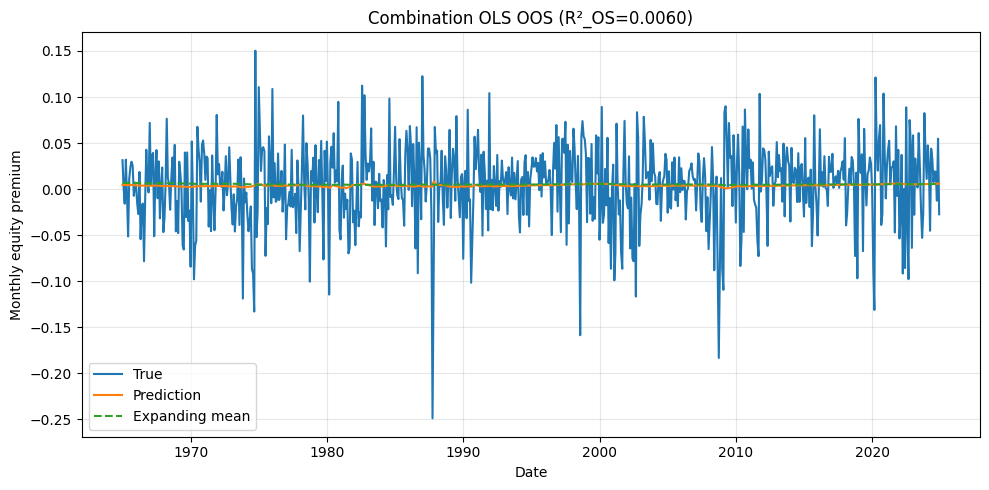

Saved new file: ../../Data/ModelData/oos_predictions.csv


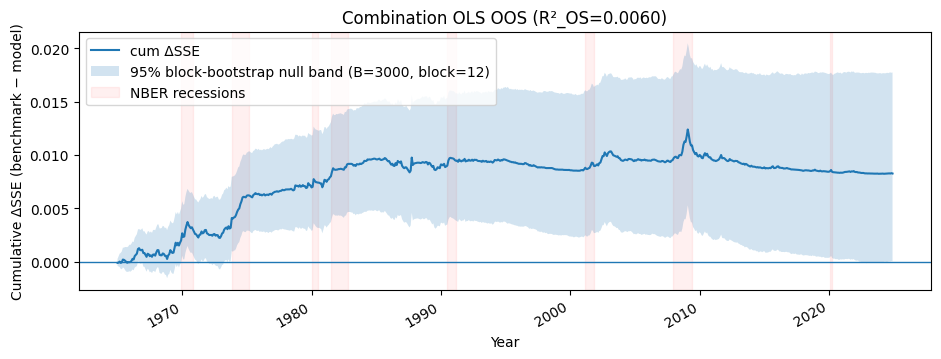

In [ ]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.pcr_oos(data, variables=WITHOUT_LOOKAHEAD_AR, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="PCR_without_lookahead_ar",
min_feat_coverage= 0.6
)
modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"PCR without lookahead AR (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"PCR without lookahead AR (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube"
)
tsh.save_oos_results(dates_o, y_true_o, y_pred_o, model_name="pcr_without_lookahead_ar")


1965-01-01 00:00:00
1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00


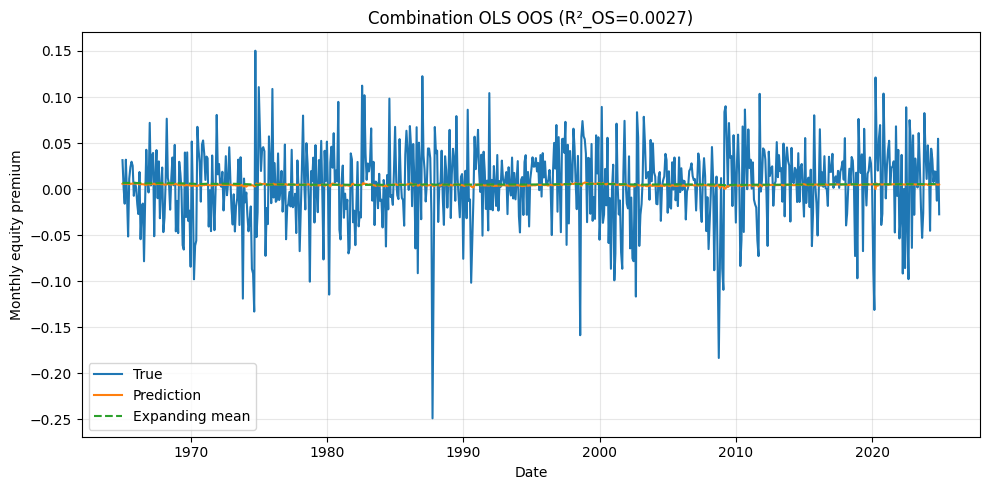

Appended model results to: ../../Data/ModelData/oos_predictions.csv


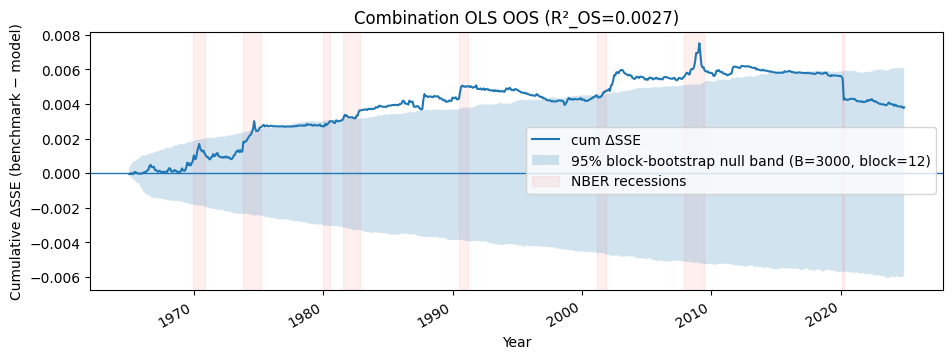

In [7]:

r2_o,stats, y_true_o, y_pred_o, dates_o,y_lower,y_upper,HA_OLS = modl.ols_combination_oos(data, variables= WITHOUT_LOOKAHEAD_AR, start_oos="1965-01-01", ct_cutoff =True, quiet =False, model_name="combination_completed", combo="mean",min_train = 24
)

modl.plot_oos(
    y_true_o, y_pred_o,HA_OLS, dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    ylabel="Monthly equity premium",
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_o, y_pred_o, HA_OLS,
    dates=dates_o,
    title=f"Combination OLS OOS (R²_OS={r2_o:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
tsh.save_oos_results(dates_o, y_true_o, y_pred_o, model_name="combination_completed")


In [10]:
from importlib import reload
reload(modl)

<module 'source.regression.regression_models' from '/Users/kilianrunnwerth/Masterarbeit/source/regression/regression_models.py'>

[Chronos-2] Loading amazon/chronos-2 on M freq with 28 covariates...


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(


1965-01-01 00:00:00


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


1965-02-01 00:00:00
1965-03-01 00:00:00
1965-04-01 00:00:00
1965-05-01 00:00:00
1965-06-01 00:00:00
1965-07-01 00:00:00
1965-08-01 00:00:00
1965-09-01 00:00:00
1965-10-01 00:00:00
1965-11-01 00:00:00
1965-12-01 00:00:00
1966-01-01 00:00:00
1966-02-01 00:00:00
1966-03-01 00:00:00
1966-04-01 00:00:00
1966-05-01 00:00:00
1966-06-01 00:00:00
1966-07-01 00:00:00
1966-08-01 00:00:00
1966-09-01 00:00:00
1966-10-01 00:00:00
1966-11-01 00:00:00
1966-12-01 00:00:00
1967-01-01 00:00:00
1967-02-01 00:00:00
1967-03-01 00:00:00
1967-04-01 00:00:00
1967-05-01 00:00:00
1967-06-01 00:00:00
1967-07-01 00:00:00
1967-08-01 00:00:00
1967-09-01 00:00:00
1967-10-01 00:00:00
1967-11-01 00:00:00
1967-12-01 00:00:00
1968-01-01 00:00:00
1968-02-01 00:00:00
1968-03-01 00:00:00
1968-04-01 00:00:00
1968-05-01 00:00:00
1968-06-01 00:00:00
1968-07-01 00:00:00
1968-08-01 00:00:00
1968-09-01 00:00:00
1968-10-01 00:00:00
1968-11-01 00:00:00
1968-12-01 00:00:00
1969-01-01 00:00:00
1969-02-01 00:00:00
1969-03-01 00:00:00


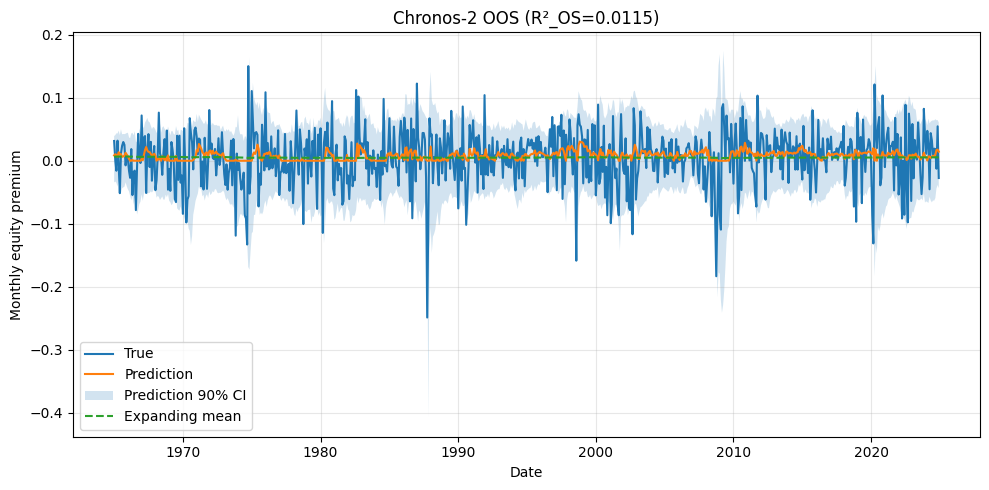

Appended model results to: ../../Data/ModelData/oos_predictions.csv


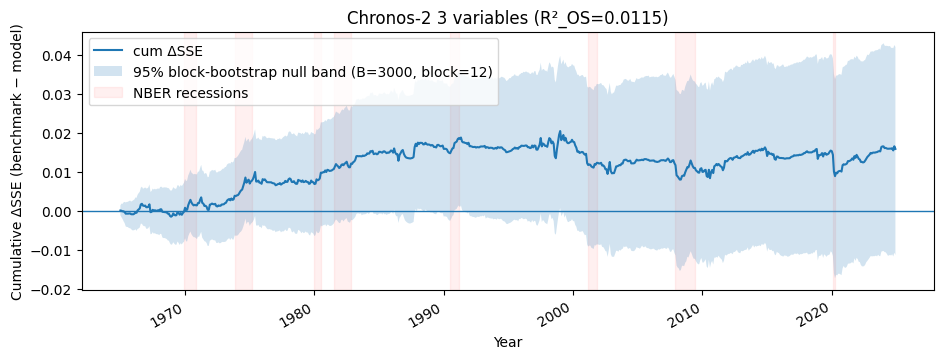

In [11]:
r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower,y_upper,HA_m = modl.chronos2_oos(
    data[data.index>= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
    ctx_min=240, ct_cutoff=True, quiet=False, mode = "mean", freq="M",
    ci = 0.9, model_name="chronos2_without_lookahead"
)

modl.plot_oos(
    y_true_m, y_pred_m, HA_m, dates=dates_m,y_lower=y_lower, y_upper=y_upper,
    title=f"Chronos-2 OOS (R²_OS={r2_m:.4f})",
    ylabel="Monthly equity premium"
)

fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_m, y_pred_m, HA_m,
    dates=dates_m,
    title=f"Chronos-2 3 variables (R²_OS={r2_m:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
    mode = "tube",
)

tsh.save_oos_results(dates_m, y_true_m, y_pred_m, model_name="chronos2_without_lookahead")


1965-01-01 00:00:00
0.8275862068965517
1965-02-01 00:00:00
0.8275862068965517
1965-03-01 00:00:00
0.8275862068965517
1965-04-01 00:00:00
0.8275862068965517
1965-05-01 00:00:00
0.8275862068965517
1965-06-01 00:00:00
0.8275862068965517
1965-07-01 00:00:00
0.8275862068965517
1965-08-01 00:00:00
0.8275862068965517
1965-09-01 00:00:00
0.8275862068965517
1965-10-01 00:00:00
0.8275862068965517
1965-11-01 00:00:00
0.8275862068965517
1965-12-01 00:00:00
0.8275862068965517
1966-01-01 00:00:00
0.8275862068965517
1966-02-01 00:00:00
0.8275862068965517
1966-03-01 00:00:00
0.8275862068965517
1966-04-01 00:00:00
0.8275862068965517
1966-05-01 00:00:00
0.8275862068965517
1966-06-01 00:00:00
0.8275862068965517
1966-07-01 00:00:00
0.8275862068965517
1966-08-01 00:00:00
0.8275862068965517
1966-09-01 00:00:00
0.8275862068965517
1966-10-01 00:00:00
0.8275862068965517
1966-11-01 00:00:00
0.8275862068965517
1966-12-01 00:00:00
0.8275862068965517
1967-01-01 00:00:00
0.8275862068965517
1967-02-01 00:00:00
0.827

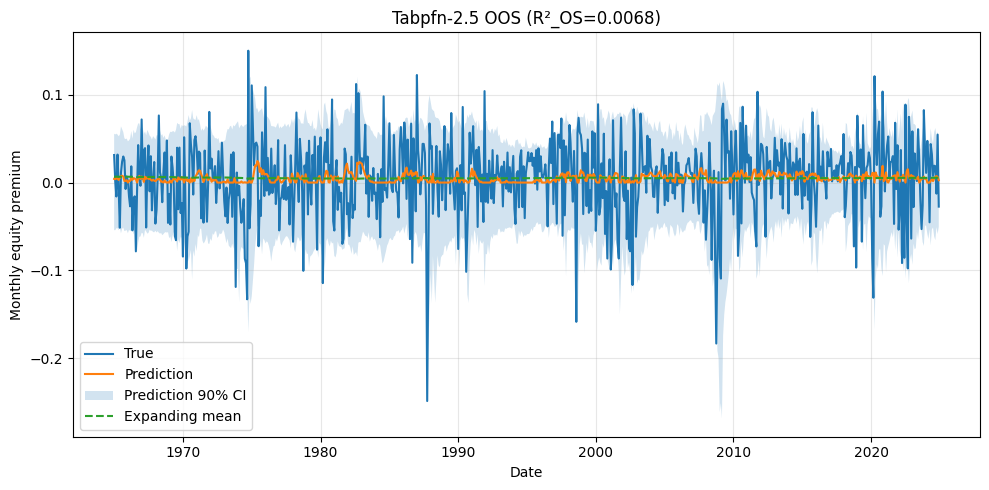

Appended model results to: ../../Data/ModelData/oos_predictions.csv


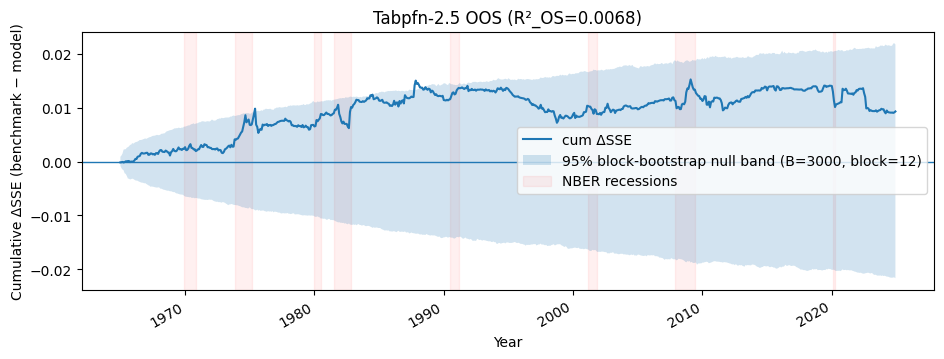

In [2]:

r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=WITHOUT_LOOKAHEAD_AR,
    start_oos="1965-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    model_name="tabpfn_without_lookahead_ar"
                            )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
tsh.save_oos_results(dates_tabpfn, y_true_tabpfn, y_pred_tabpfn, model_name="tabpfn_without_lookahead_ar")

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=WITHOUT_LOOKAHEAD_AR,
    start_oos="1965-01-01",
    lag = 3,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    model_name="tabpfn_without_lookahead_ar_lag3"
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

tsh.save_oos_results(dates_tabpfn, y_true_tabpfn, y_pred_tabpfn, model_name="tabpfn_without_lookahead_ar_lag3")

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=("equity_premium",),
    start_oos="1965-01-01",
    lag=100,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    model_name="tabpfn_autoregressive_benchmark"
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)
tsh.save_oos_results(dates_tabpfn, y_true_tabpfn, y_pred_tabpfn, model_name="tabpfn_autoregressive_benchmark")

In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=WITHOUT_LOOKAHEAD_AR,
    start_oos="1965-01-01",
    lag=8,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    model_name="tabpfn_without_lookahead_ar_lag8"
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

tsh.save_oos_results(dates_tabpfn, y_true_tabpfn, y_pred_tabpfn, model_name="tabpfn_without_lookahead_ar_lag8")


In [ ]:


r2_tabpfn, stats, y_true_tabpfn, y_pred_tabpfn, dates_tabpfn, y_lowers_tab, y_upper_tab, HA_Tab = modl.tabpfn_oos_fit_each_step(
    data,
    variables=WITHOUT_LOOKAHEAD_AR,
    start_oos="1957-01-01",
    lag=1,
    min_train=120,
    ct_cutoff=True,
    quiet=False,
    model_params='2.5',  # or just omit this argument,
    model_name="tabpfn_without_lookahead_ar_1957"
    )

modl.plot_oos(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab, dates=dates_tabpfn,y_lower=y_lowers_tab, y_upper=y_upper_tab,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    ylabel="Monthly equity premium"
)
fig, ax, perf, (lo, hi) = modl.plot_cum_dsse_with_bootstrap_band(
    y_true_tabpfn, y_pred_tabpfn, HA_Tab,
    dates=dates_tabpfn,
    title=f"Tabpfn-2.5 OOS (R²_OS={r2_tabpfn:.4f})",
    add_band=True,
    B=3000,
    block=12,
    seed=1,
)

tsh.save_oos_results(dates_tabpfn, y_true_tabpfn, y_pred_tabpfn, model_name="tabpfn_without_lookahead_ar_1957")


In [18]:
import numpy as np
import pandas as pd
import os

def save_bootstrap_results(
    r2_values: list, 
    model_desc: str, 
    output_filename: str = "bootstrap_results.csv"
):
    """
    Calculates statistics from a list of R2 values and appends them
    to a CSV file. If the file doesn't exist, it creates it with a header.
    """
    if not r2_values:
        print("Error: The R2 values list is empty. No data to save.")
        return

    # 1. Calculate statistics
    r2_array = np.array(r2_values)
    avg_r2 = np.mean(r2_array)
    std_r2 = np.std(r2_array)
    ci_lower = np.percentile(r2_array, 2.5)   # 95% CI Lower Bound
    ci_upper = np.percentile(r2_array, 97.5)  # 95% CI Upper Bound

    # Print summary to console for immediate feedback
    print(f"\n--- Statistics for: {model_desc} ---")
    print(f"Mean R2:          {avg_r2:.4f}")
    print(f"Standard Dev:     {std_r2:.4f}")
    print(f"95% CI:           [{ci_lower:.4f}, {ci_upper:.4f}]")
    print(f"Samples:          {len(r2_array)}")

    # 2. Prepare the data for CSV
    new_results_df = pd.DataFrame([{
        "model_description": model_desc,
        "mean_r2": avg_r2,
        "std_dev": std_r2,
        "ci_95_lower": ci_lower,
        "ci_95_upper": ci_upper,
        "n_iterations": len(r2_array)
    }])

    # 3. Append to CSV
    # header is only written if the file does not already exist
    file_exists = os.path.isfile(output_filename)
    new_results_df.to_csv(
        output_filename, 
        mode='a', 
        index=False, 
        header=not file_exists
    )

    print(f"Row successfully added to {output_filename}\n")

# --- Example of how to call it in your code ---


In [19]:
r2_values_12 = []
for i in range(1,50):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,12,False,False),
        save_results = False
    )


    r2_values_12.append(r2_m)
r2_array = np.array(r2_values_12)
desc = "Chronos2 OOS - Block Bootstrap (Size 12), Start 1965, no fixing"
save_bootstrap_results(r2_values_12, desc)

1


/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/huggingface_hub/file_download.py:942: FutureWarning: `resume_download` is deprecated and will be removed in version 1.0.0. Downloads always resume when possible. If you want to force a new download, use `force_download=True`.
  warnings.warn(
/opt/anaconda3/envs/tsfm/lib/python3.11/site-packages/torch/utils/data/dataloader.py:692: UserWarning: 'pin_memory' argument is set as true but not supported on MPS now, device pinned memory won't be used.
  warnings.warn(warn_msg)


KeyboardInterrupt: 

In [ ]:
r2_values_12 = []
for i in range(1,50):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,12,True,True),
        save_results = False
    )


    r2_values_12.append(r2_m)
r2_array = np.array(r2_values_12)
desc = "Chronos2 OOS - Block Bootstrap (Size 12), Start 1965, fixing"
save_bootstrap_results(r2_values_12, desc)

In [ ]:
r2_values_1 = []
for i in range(1,50):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,1,True,True),save_results = False
    )


    r2_values_1.append(r2_m)
r2_array = np.array(r2_values_1)
desc = "Chronos2 OOS - Block Bootstrap (Size 1), Start 1965, fixing"
save_bootstrap_results(r2_values_1, desc)

In [ ]:
r2_values_1 = []
for i in range(1,50):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,1,False,False),save_results = False
    )


    r2_values_1.append(r2_m)
desc = "Chronos2 OOS - Block Bootstrap (Size 1), Start 1965, no fixing"
save_bootstrap_results(r2_values_1, desc)

In [ ]:
r2_values_120 = []
for i in range(1,50):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,120,True,True), save_results = False
    )


    r2_values_120.append(r2_m)
r2_array = np.array(r2_values_120)
desc = "Chronos2 OOS - Block Bootstrap (Size 120), Start 1965,fixing"
save_bootstrap_results(r2_values_120, desc)

In [ ]:
r2_values_120 = []
for i in range(1,50):
    print(i)
    r2_m, stats, y_true_m, y_pred_m, dates_m, y_lower, y_upper, HA_m = modl.chronos2_oos(
        data[data.index >= "1927-01-01"], covariates=WITHOUT_LOOKAHEAD, start_oos="1965-01-01",
        ctx_min=256, ct_cutoff=True, quiet=True, mode = "mean", freq="M", bootstrap=(i,120,False,False),save_results = False
    )


    r2_values_120.append(r2_m)

desc = "Chronos2 OOS - Block Bootstrap (Size 120), Start 1965, no fixing"
save_bootstrap_results(r2_values_120, desc)

In [ ]:
# Pick the monthly variables you actually have in `data`:

monthly_vars = [v for v in WITHOUT_LOOKAHEAD if v in data.columns]

ranking = modl.rank_monthly_predictors(
    data,
    monthly_vars=monthly_vars,
    start_date="1927-01-01",
    start_oos="1965-01-01",
    lag=1,
    quiet=True,  # set False to see printed ranking
      ct_cutoff=True,
)
